In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

import pandas_profiling
from pandas_profiling import ProfileReport

In [2]:
team_info = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/team_info.csv")
team_info.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


In [3]:
game_team_stats = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/game_teams_stats.csv")
game_team_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [4]:
x = game_team_stats.groupby(['head_coach','team_id']).sum().reset_index()
x

,head_coach,team_id,game_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,Adam Oates,1,92644960258,20,100.0,1077.0,988.0,431.0,107.0,19.0,2174.1,318.0,256.0,601.0
1,Adam Oates,15,275728878854,68,383.0,3989.0,3239.0,1552.0,471.0,115.0,6745.5,1088.0,928.0,2106.0
2,Al Arbour,2,2007020173,1,4.0,32.0,19.0,10.0,4.0,0.0,0.0,14.0,10.0,17.0
3,Al MacNeil,20,22022224976,4,21.0,293.0,49.0,169.0,52.0,6.0,0.0,0.0,0.0,0.0
4,Alain Nasreddine,1,173635784924,38,240.0,2634.0,1730.0,846.0,274.0,58.0,4002.4,868.0,638.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Travis Green,23,843622933660,193,1200.0,12539.0,9109.0,3870.0,1359.0,279.0,21512.2,3543.0,2775.0,6516.0
235,Trent Yawney,16,206538114796,33,257.0,3013.0,1718.0,1896.0,517.0,65.0,0.0,629.0,545.0,1198.0
236,Wayne Gretzky,27,658138762883,143,867.0,9420.0,6225.0,5241.0,1624.0,275.0,0.0,2227.0,1863.0,4332.0
237,Willie Desjardins,23,507779253067,111,614.0,7219.0,4704.0,2493.0,728.0,120.0,12072.0,1996.0,1504.0,3389.0


In [5]:
Reduced_Team_Inf = team_info.drop(['franchiseId','abbreviation','link'],axis='columns')
y = Reduced_Team_Inf.sort_values(by='team_id',ascending=True).reset_index(drop=True)
y.head()

,team_id,shortName,teamName
0,1,New Jersey,Devils
1,2,NY Islanders,Islanders
2,3,NY Rangers,Rangers
3,4,Philadelphia,Flyers
4,5,Pittsburgh,Penguins


In [6]:
q = pd.merge(y,x, how='inner').drop(['game_id'], axis = 'columns')
q

,team_id,shortName,teamName,head_coach,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,1,New Jersey,Devils,Adam Oates,20,100.0,1077.0,988.0,431.0,107.0,19.0,2174.1,318.0,256.0,601.0
1,1,New Jersey,Devils,Alain Nasreddine,38,240.0,2634.0,1730.0,846.0,274.0,58.0,4002.4,868.0,638.0,1414.0
2,1,New Jersey,Devils,Brent Sutter,97,436.0,5060.0,2919.0,2032.0,627.0,108.0,0.0,989.0,974.0,1800.0
3,1,New Jersey,Devils,Claude Julien,47,200.0,2268.0,1304.0,801.0,355.0,63.0,0.0,825.0,622.0,1079.0
4,1,New Jersey,Devils,Jacques Lemaire,77,330.0,3822.0,2471.0,1225.0,406.0,68.0,2494.1,1094.0,805.0,1479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,52,Winnipeg,Jets,Paul Maurice,371,2121.0,21796.0,17277.0,6835.0,2197.0,447.0,35226.4,6913.0,4990.0,9926.0
229,53,Arizona,Coyotes,Dave Tippett,89,564.0,6940.0,6402.0,2594.0,765.0,137.0,12678.6,1610.0,1376.0,3636.0
230,53,Arizona,Coyotes,Rick Tocchet,181,1048.0,12398.0,9307.0,2868.0,1241.0,213.0,19516.9,3512.0,2677.0,6034.0
231,54,Vegas,Golden Knights,Gerard Gallant,204,1163.0,12768.0,10419.0,3051.0,1107.0,219.0,18803.7,3439.0,4043.0,5371.0


C:\Users\keati\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goals', ylabel='Density'>

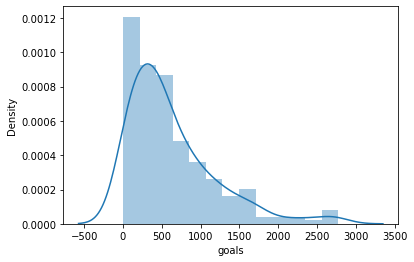

In [49]:
sns.distplot(q['goals'])

<AxesSubplot:>

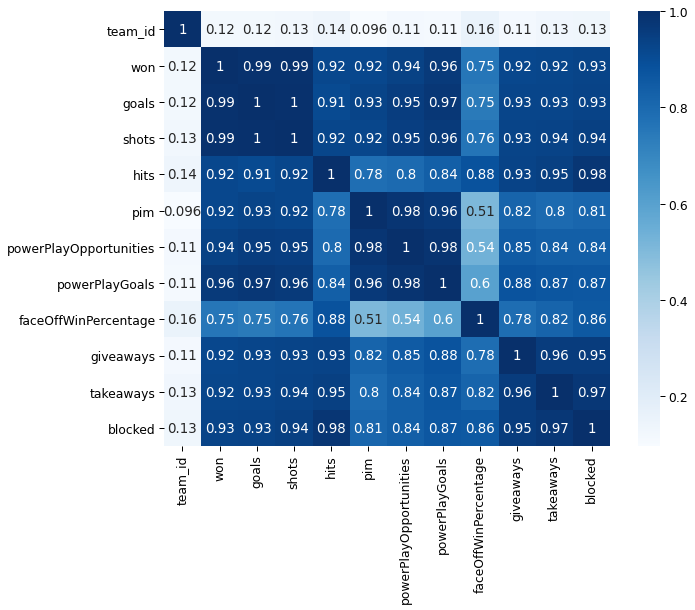

In [56]:
plt.figure(figsize=(10,8))
z = q.corr()
sns.heatmap(z, annot=True, cmap='Blues')

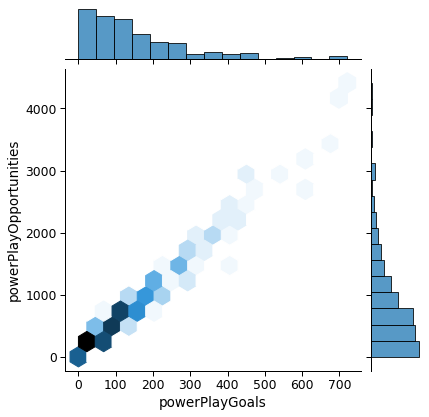

In [58]:
sns.jointplot(x='powerPlayGoals', y='powerPlayOpportunities', data=q,kind='hex')

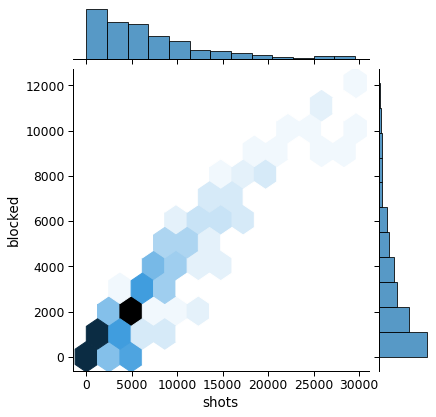

In [59]:
sns.jointplot(x='shots', y='blocked', data=q,kind='hex')

In [7]:
##q.profile_report()

<AxesSubplot:xlabel='won', ylabel='head_coach'>

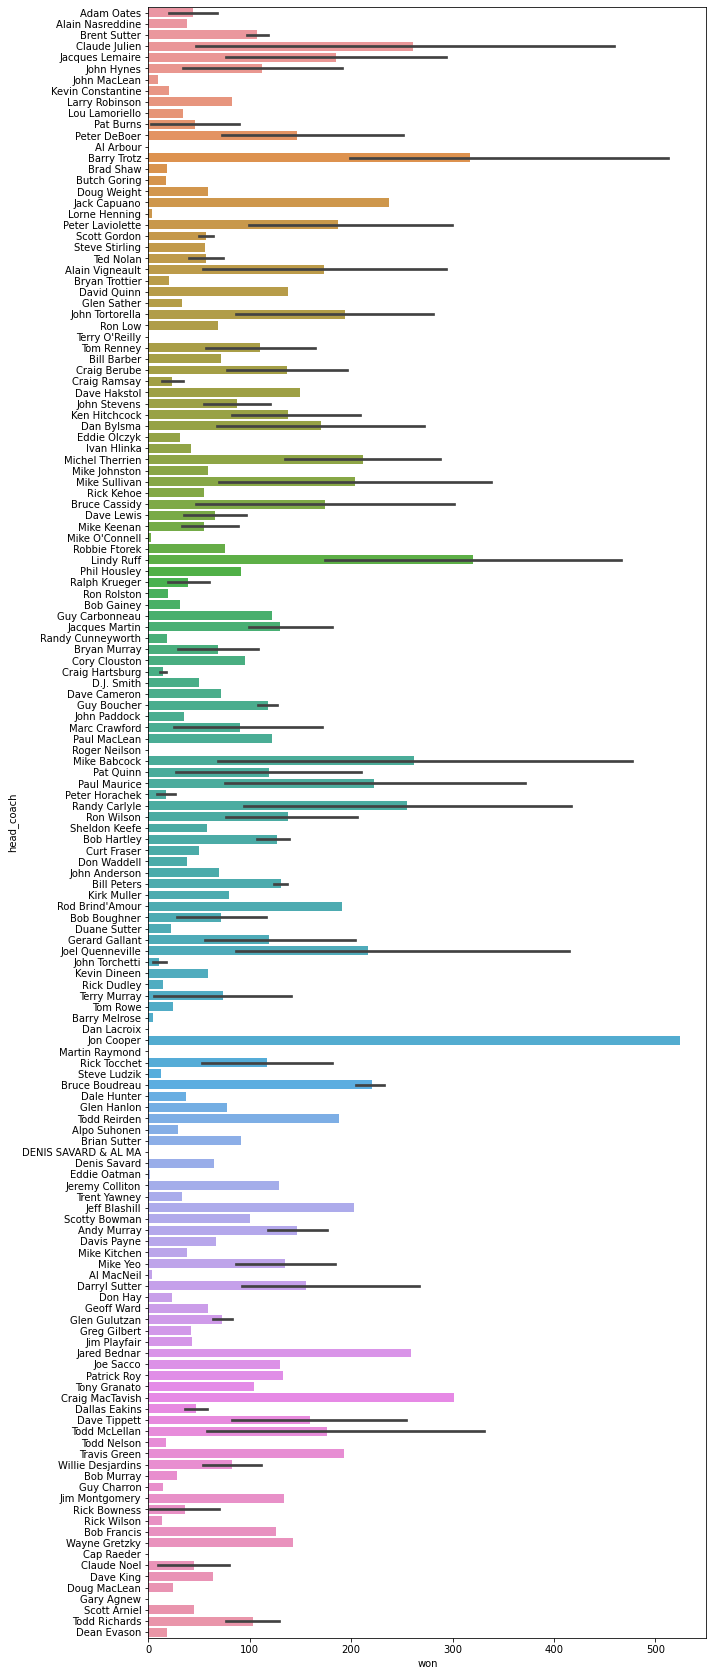

In [8]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x='won',y='head_coach',data=q)

In [46]:
k = q.groupby(["won",'teamName'])['head_coach'].max().reset_index()
k

,won,teamName,head_coach
0,0,Blackhawks,DENIS SAVARD & AL MA
1,0,Blue Jackets,Gary Agnew
2,0,Lightning,Martin Raymond
3,1,Islanders,Al Arbour
4,1,Lightning,Dan Lacroix
...,...,...,...
226,466,Sabres,Lindy Ruff
227,477,Red Wings,Mike Babcock
228,509,Blackhawks,Joel Quenneville
229,512,Predators,Barry Trotz


Text(0.5, 1.0, 'Most Wins for each Team')

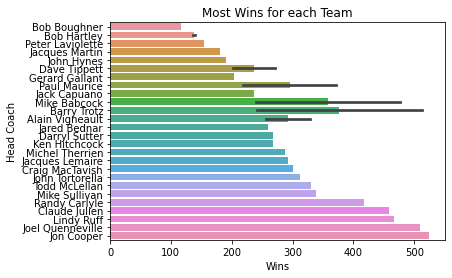

In [45]:
Most_wins = k.sort_values('won').drop_duplicates('teamName', keep = 'last').reset_index(drop=True)
sns.barplot(x='won',y='head_coach',data=Most_wins,linewidth=4)
plt.xlabel("Wins")
plt.ylabel("Head Coach")
plt.title("Most Wins for each Team")